In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import metrics
from sklearn.metrics import classification_report

In [3]:
wine_data = pd.read_csv('whitewinequality-white.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df = wine_data.copy()

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


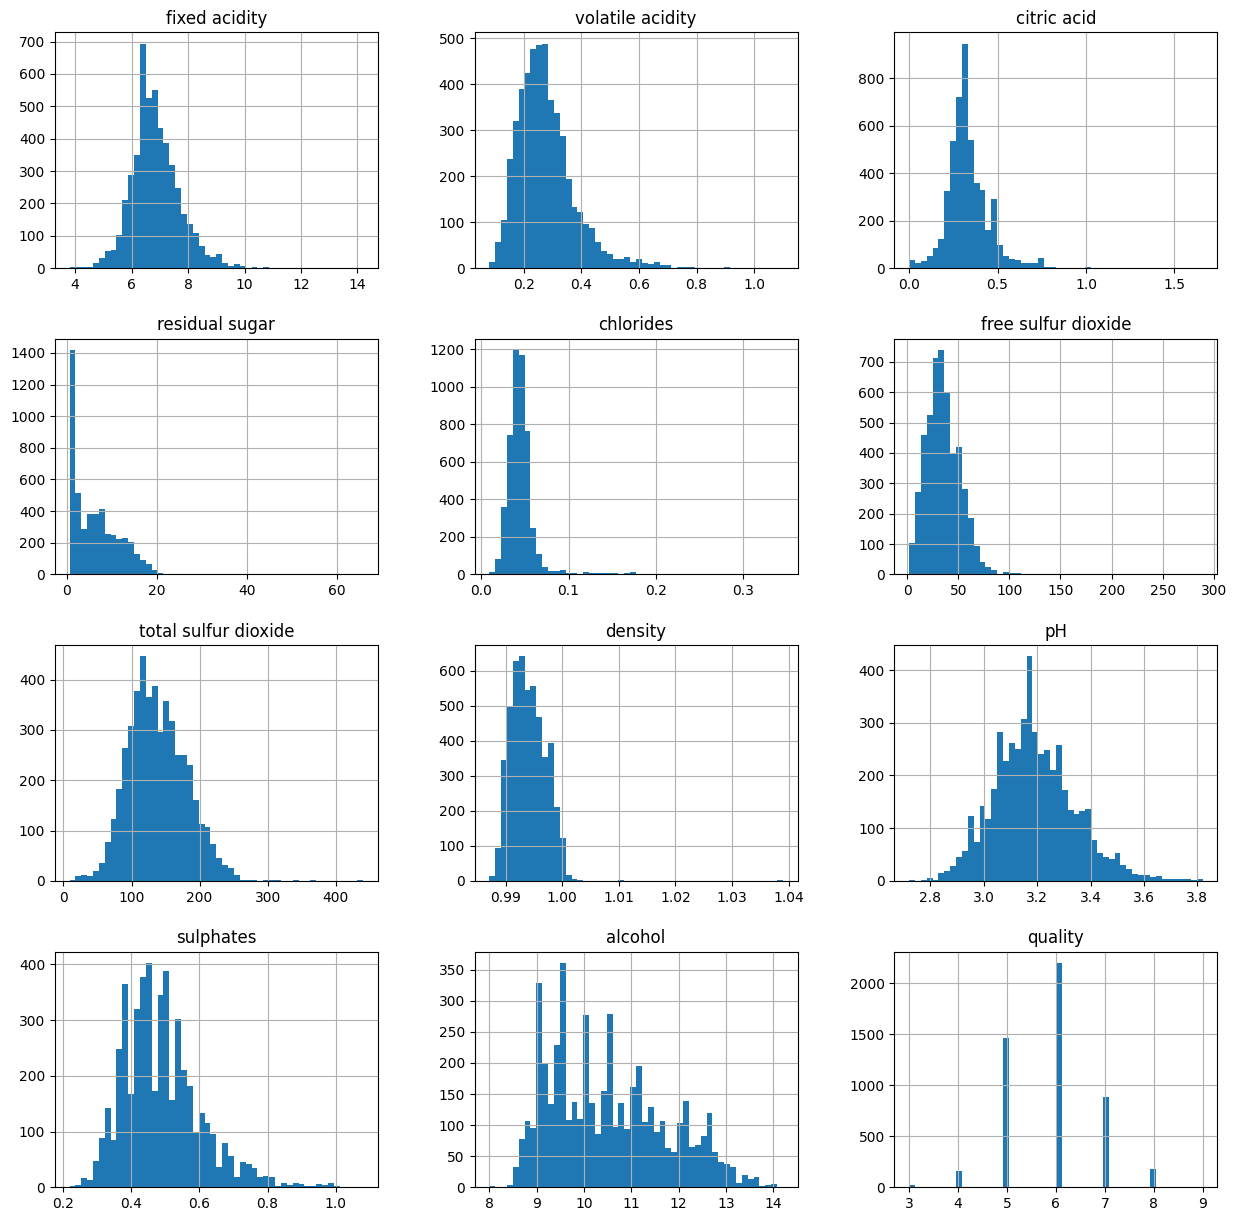

In [8]:
df.hist(bins=50, figsize=(15,15));

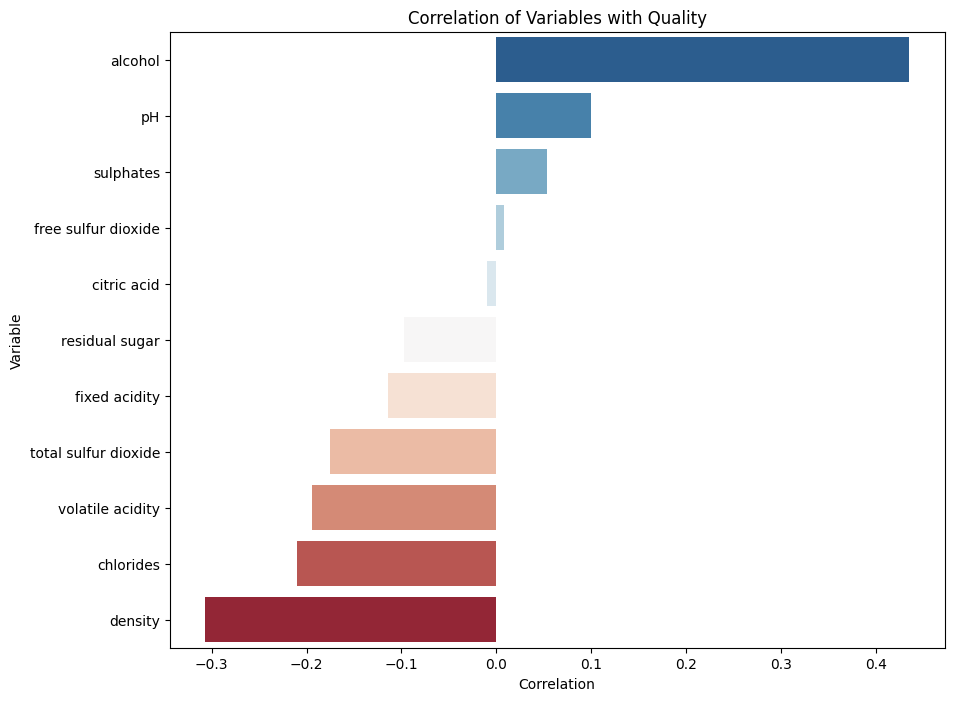

In [9]:
correlation_matrix = df.corr()

correlation_values = correlation_matrix['quality'].drop('quality')
correlation_values_sorted = correlation_values.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_values_sorted.values, y=correlation_values_sorted.index, palette = 'RdBu_r')
plt.xlabel('Correlation')
plt.ylabel('Variable')
plt.title('Correlation of Variables with Quality')
plt.show()
     

Yorum: Burada en çok korelasyona sahip olan variable'lar alkol ve density olarak görülmekte. Lineer regresyon modelinde de bunu destekler nitelikte katsayılar çıkmıştı.

In [12]:
df['value'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)
df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,value
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,1
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,1


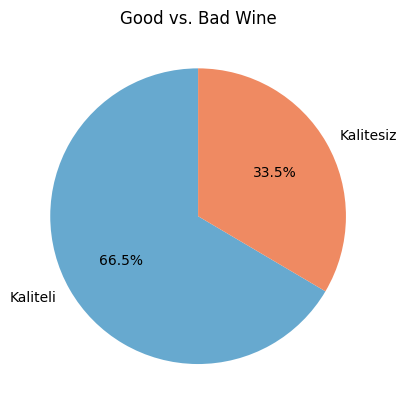

In [30]:
# Burada elimizdeki data setinin kaliteli veya kalitesiz olarak pie chart dağılımı bulunmakta.
quality_counts = df['value'].value_counts()
labels = ['Kaliteli', 'Kalitesiz']
colors = ['#67a9cf' , '#ef8a62']
plt.pie(quality_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors = colors)
plt.title("Good vs. Bad Wine")
plt.show()

In [31]:
# Bu aşamada feature score'lara bakarak modele eklemek istemediğimiz variable'ları bulacağız:
X = df.drop(['quality', 'value'], axis=1) 
Y = df['value']

In [32]:
selector = SelectKBest(score_func= f_classif, k='all')
selector.fit_transform(X, Y)


feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

top_features = feature_scores
top_features

,Feature,Score
10,alcohol,843.093036
7,density,380.984117
1,volatile acidity,262.153822
4,chlorides,171.449782
6,total sulfur dioxide,147.341333
3,residual sugar,42.489526
0,fixed acidity,39.757005
8,pH,34.531275
9,sulphates,13.201936
5,free sulfur dioxide,0.007998


Free sulfur dioxide ve citric acid scor'ları oldukça düşük çıktığından modele dahil etmeyeceğim

# Logistic Regression

In [25]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'value'],
      dtype='object')

In [26]:
X = df[['fixed acidity', 'volatile acidity', 'residual sugar',
       'chlorides', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
Y = df[['value']] 

In [27]:
# Split the dataset for training and testing
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# Initialize logistic regression body
logreg= LogisticRegression(max_iter = 1000)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

df_test = pd.DataFrame(X_test, columns=X.columns)
df_test['Binary Quality'] = df['value']
df_test['Predicted Quality'] = y_pred
df_test.head()
     

C:\Users\nilay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,Binary Quality,Predicted Quality
4656,6.0,0.29,10.8,0.048,149.0,0.99370,3.09,0.59,10.966667,1,1
3659,5.4,0.53,2.7,0.036,128.0,0.98856,3.20,0.53,13.200000,1,1
907,7.1,0.25,2.1,0.036,124.0,0.99080,3.28,0.43,12.200000,1,1
4352,7.3,0.28,1.6,0.054,148.0,0.99178,3.18,0.47,10.700000,0,1
3271,6.5,0.32,5.7,0.044,91.0,0.99184,3.28,0.60,12.000000,1,1


In [28]:
# Evaluation metrics
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Recall', metrics.recall_score(y_test, y_pred))
print('Precision', metrics.precision_score(y_test, y_pred))
print('F1 score', metrics.f1_score(y_test, y_pred))

Accuracy: 0.7408163265306122
Recall 0.8694992412746586
Precision 0.7732793522267206
F1 score 0.8185714285714285


Yorum: Burada 6'ya eş ve daha yüksek değerleri kaliteli şarap olarak sınıflandırdım ve 1 değerini verdim, diğerleri ise 0 olarak numaralandırlımış oldu. Öncelikle datasetimi tanımak adına beş nokta özetine ve değerlerin histogramlarına baktım. Fetaure score'ları tablosunu da görselleştirdikten sonra en düşük çıkmış iki variable'ı eledim. Kalanlarla da modeli oluşturdum.

Modelin accurancy değeri %74. 
Recall değeri, yani 1 olduğunda 1 olduğunu tahminleme, pozitif durumu doğru tespit edebilme kapasitesi de %87 çıktı.

Yüksek density değerleri düşük kalite şarap ile özdeşleşiyor. Yüksek alkol oranı da daha yüksek kalite ile özdeşleştirilebilir. 

Free sulfur dioxide ve citric acid'in beyaz şarap üzerinde çok fazla etkisi bulunmamaktadır.